<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/Case_Study_Telecom_Attack_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Telecom_Attack_Binary

## Business Problem

To identify whether a telecom network is under attack or not based on the network logs.

## Importing the packages

In [ ]:
!pip install pandas_profiling==2.5.0

In [ ]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.8.1
pandas-gbq==0.11.0
pandas-profiling==2.5.0
sklearn-pandas==1.8.0


In [ ]:
# Uploading files to colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd                                                       # Pandas package for reading csv files
import numpy as np                                                        # Numpy package for computing
import matplotlib.pyplot as plt                                           # Visualization package
%matplotlib inline
import seaborn as sns                                                     # Visualization package
import dask.dataframe as dd                                               # Dask to read dataframe



In [ ]:
# Installing necessary packages

!pip -q install imgaug==0.2.6
!pip -q install shap
!pip -q install lime
!pip -q install eli5

     |████████████████████████████████| 634kB 2.7MB/s 
     |████████████████████████████████| 276kB 2.6MB/s 
     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 112kB 2.7MB/s 


### Reading the data with Pandas

In [ ]:
%time                                                           # Check the time to run a particular cell
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Projects/Case Studies/Telecom_Attack/train.csv')  # Reading data using simple Pandas
train.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


Duration Protocol_type  ... attack last_flag
0         0           tcp  ...    1.0        20
1         0           tcp  ...    0.0        21
2         0          icmp  ...    0.0        18
3         0           tcp  ...    0.0        21
4         0           tcp  ...    0.0        21

[5 rows x 43 columns]

### Reading the data with Dask

In [ ]:
%time                                                           # Check the time to read a particular cell
dask_train = dd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Projects/Case Studies/Telecom_Attack/train.csv')                        # Reading data using dask

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


For now we will continue to work with our pandas dataframe.

In [ ]:
print(train.shape)                                                # Checking the number of rows and columns in the dataframe

(82000, 43)


In [ ]:
pd.set_option('display.max_columns', 50)                          # For displaying all the columns
train.head()

Duration Protocol_type   Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           tcp      time   S0          0          0     0   
1         0           tcp      http   SF        241      12079     0   
2         0          icmp     urp_i   SF         78          0     0   
3         0           tcp      http   SF        229        309     0   
4         0           tcp  ftp_data   SF      12165          0     0   

   Wrong_fragment  Urgent  Hot  Num_failed_logins  Logged_in  Num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          1                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   Root_shell  Su_attempted  Num_root  Num_file_creations  Num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   Num_access_files  Num_outbound_cmds  Is_hot_login  Is_guest_login  Count  \
0                 0                  0             0               0    234   
1                 0                  0             0               0      3   
2                 0                  0             0               0     42   
3                 0                  0             0               0      7   
4                 0                  0             0               0      5   

   Srv_count  Serror_rate  Srv_serror_rate  Rerror_rate  Srv_rerror_rate  \
0         14          1.0              1.0          0.0              0.0   
1          3          0.0              0.0          0.0              0.0   
2          2          0.0              0.0          0.0              0.0   
3          7          0.0              0.0          0.0              0.0   
4          5          0.0              0.0          0.0              0.0   

   Same_srv_rate  Diff_srv_rate  Srv_diff_host_rate  Dst_host_count  \
0           0.06           0.06                 0.0             255   
1           1.00           0.00                 0.0              32   
2           0.05           0.05                 0.0             255   
3           1.00           0.00                 0.0              58   
4           1.00           0.00                 0.0             143   

   Dst_host_srv_count  Dst_host_same_srv_rate  Dst_host_diff_srv_rate  \
0                  14                    0.05                    0.07   
1                 255                    1.00                    0.00   
2                  18                    0.07                    0.01   
3                 255                    1.00                    0.00   
4                  44                    0.27                    0.03   

   Dst_host_same_src_port_rate  Dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.03                         0.04   
2                         0.07                         0.00   
3                         0.02                         0.01   
4                         0.27                         0.05   

   Dst_host_serror_rate  Dst_host_srv_serror_rate  Dst_host_rerror_rate  \
0                   1.0                       1.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   Dst_host_srv_

In [ ]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

0.0    67342
1.0    14658
Name: attack, dtype: int64

**This is an imbalanced class classification**

## Exploratory Data Analysis

In [ ]:
# Using Pandas profiling package to perform EDA

import pandas_profiling

report=pandas_profiling.ProfileReport(train, minimal=True)
report.to_file('train_EDA.html')   # Creating HTML file of pandas-profiling report

In [ ]:
from IPython.display import display, HTML, IFrame
display(HTML(open('train_EDA.html').read()))

In this report we are able to see that there is strong correlation between a lot of columns.  <br>
If this were a regression problem these columns are bad and needed to be dropped. But this is a classification columns.

In [ ]:
# Checking the data types and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82000 entries, 0 to 81999
Data columns (total 43 columns):
Duration                       82000 non-null int64
Protocol_type                  82000 non-null object
Service                        82000 non-null object
Flag                           82000 non-null object
Src_bytes                      82000 non-null int64
Dst_bytes                      82000 non-null int64
Land                           82000 non-null int64
Wrong_fragment                 82000 non-null int64
Urgent                         82000 non-null int64
Hot                            82000 non-null int64
Num_failed_logins              82000 non-null int64
Logged_in                      82000 non-null int64
Num_compromised                82000 non-null int64
Root_shell                     82000 non-null int64
Su_attempted                   82000 non-null int64
Num_root                       82000 non-null int64
Num_file_creations             82000 non-null int64
Num_

**There are no null values.**

In [ ]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [ ]:
# These are important Insights 
# If your DST & SRC Bytes are above 5000-7000 then, no Attack 
# If Num_Com = 1, then attack 

In [ ]:

train[(train['Num_compromised'] < 1)]['attack'].value_counts()

0.0    66970
1.0    14407
Name: attack, dtype: int64

In [ ]:
train.describe().T

count          mean           std  min    25%  \
Duration                     82000.0    204.415256  1.825495e+03  0.0   0.00   
Src_bytes                    82000.0  11909.053793  3.852300e+05  0.0  42.00   
Dst_bytes                    82000.0   8611.221915  1.399359e+06  0.0   0.00   
Land                         82000.0      0.000159  1.259021e-02  0.0   0.00   
Wrong_fragment               82000.0      0.009305  1.634210e-01  0.0   0.00   
Urgent                       82000.0      0.000171  1.780584e-02  0.0   0.00   
Hot                          82000.0      0.217707  2.227594e+00  0.0   0.00   
Num_failed_logins            82000.0      0.001244  4.604812e-02  0.0   0.00   
Logged_in                    82000.0      0.589829  4.918675e-01  0.0   0.00   
Num_compromised              82000.0      0.419951  2.967376e+01  0.0   0.00   
Root_shell                   82000.0      0.001756  4.186926e-02  0.0   0.00   
Su_attempted                 82000.0      0.001683  5.584941e-02  0.0   0.00   
Num_root                     82000.0      0.463098  3.024049e+01  0.0   0.00   
Num_file_creations           82000.0      0.018439  5.907464e-01  0.0   0.00   
Num_shells                   82000.0      0.000524  2.443958e-02  0.0   0.00   
Num_access_files             82000.0      0.006207  1.226663e-01  0.0   0.00   
Num_outbound_cmds            82000.0      0.000000  0.000000e+00  0.0   0.00   
Is_hot_login                 82000.0      0.000012  3.492151e-03  0.0   0.00   
Is_guest_login               82000.0      0.011476  1.065085e-01  0.0   0.00   
Count                        82000.0     46.076378  8.768438e+01  0.0   1.00   
Srv_count                    82000.0     27.509061  6.454852e+01  0.0   2.00   
Serror_rate                  82000.0      0.118588  3.165014e-01  0.0   0.00   
Srv_serror_rate              82000.0      0.117020  3.153951e-01  0.0   0.00   
Rerror_rate                  82000.0      0.072776  2.562869e-01  0.0   0.00   
Srv_rerror_rate              82000.0      0.073413  2.573702e-01  0.0   0.00   
Same_srv_rate                82000.0      0.850487  3.312877e-01  0.0   1.00   
Diff_srv_rate                82000.0      0.042049  1.609108e-01  0.0   0.00   
Srv_diff_host_rate           82000.0      0.115094  2.674015e-01  0.0   0.00   
Dst_host_count               82000.0    160.831585  1.022028e+02  0.0  50.00   
Dst_host_srv_count           82000.0    161.639915  1.063395e+02  0.0  32.00   
Dst_host_same_srv_rate       82000.0      0.700178  4.027226e-01  0.0   0.25   
Dst_host_diff_srv_rate       82000.0      0.056783  1.568297e-01  0.0   0.00   
Dst_host_same_src_port_rate  82000.0      0.131427  2.765248e-01  0.0   0.00   
Dst_host_srv_diff_host_rate  82000.0      0.028474  8.856473e-02  0.0   0.00   
Dst_host_serror_rate         82000.0      0.118807  3.150127e-01  0.0   0.00   
Dst_host_srv_serror_rate     82000.0      0.111660  3.106913e-01  0.0   0.00   
Dst_host_rerror_rate         82000.0      0.074007  2.461732e-01  0.0   0.00   
Dst_host_srv_rerror_rate     82000.0      0.073015  2.503961e-01  0.0   0.00   
attack                       82000.0      0.178756  3.831503e-01  0.0   0.00   
last_flag                    82000.0     20.009890  1.855080e+00  0.0  20.00   

                                50%      75%          max  
Duration                       0.00     0.00      42778.0  
Src_bytes                    215.00   312.00   89581520.0  
Dst_bytes                    313.00  1512.00  400291060.0  
Land                           0.00     0.00          1.0  
Wrong_fragment                 0.00     0.00          3.0  
Urgent                         0.00     0.00          3.0  
Hot                            0.00     0.00         77.0  
Num_failed_logins              0.00     0.00          4.0  
Logged_in                      1.00     1.00          1.0  
Num_compromised                0.00     0.00       7479.0  
Root_shell                     0.00     0.00          1.0  
Su_attempted                  

There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [ ]:
# Lets plot the correlation matrix 

corr_matrix = train.corr()
corr_matrix

Duration  Src_bytes  Dst_bytes      Land  \
Duration                     1.000000   0.015477   0.077427 -0.001410   
Src_bytes                    0.015477   1.000000   0.016087 -0.000389   
Dst_bytes                    0.077427   0.016087   1.000000 -0.000077   
Land                        -0.001410  -0.000389  -0.000077  1.000000   
Wrong_fragment              -0.006376  -0.001744  -0.000350 -0.000717   
Urgent                       0.007207  -0.000273   0.000961 -0.000121   
Hot                          0.004310   0.000437  -0.000180 -0.001231   
Num_failed_logins            0.023874  -0.000805   0.002594 -0.000340   
Logged_in                   -0.086462   0.013972  -0.002726 -0.015100   
Num_compromised              0.076148  -0.000381   0.004506 -0.000178   
Root_shell                   0.103768  -0.001066   0.004536 -0.000528   
Su_attempted                 0.155859  -0.000853   0.004289 -0.000379   
Num_root                     0.081181  -0.000423   0.004501 -0.000193   
Num_file_creations           0.176950  -0.000503   0.000576 -0.000393   
Num_shells                  -0.001913  -0.000449  -0.000119 -0.000270   
Num_access_files             0.127336  -0.001366   0.001622 -0.000637   
Num_outbound_cmds                 NaN        NaN        NaN       NaN   
Is_hot_login                -0.000297  -0.000106  -0.000002 -0.000044   
Is_guest_login              -0.005410  -0.003086  -0.000474 -0.001357   
Count                       -0.056181  -0.015488  -0.003011 -0.005623   
Srv_count                   -0.045141  -0.012135  -0.002252 -0.004991   
Serror_rate                 -0.040904  -0.010178  -0.001856  0.035068   
Srv_serror_rate             -0.041176  -0.010031  -0.001862  0.035253   
Rerror_rate                  0.138054  -0.008593   0.011936 -0.003576   
Srv_rerror_rate              0.141844  -0.008513   0.011887 -0.003592   
Same_srv_rate                0.020497   0.012281   0.002744  0.002788   
Diff_srv_rate                0.031456  -0.002454  -0.001527 -0.002809   
Srv_diff_host_rate          -0.046641  -0.007848  -0.001948  0.038049   
Dst_host_count               0.057049  -0.008670   0.002521 -0.019693   
Dst_host_srv_count          -0.162204  -0.032315  -0.005415 -0.018612   
Dst_host_same_srv_rate      -0.173513  -0.026382  -0.005982  0.009375   
Dst_host_diff_srv_rate       0.313536   0.006399   0.009482 -0.004559   
Dst_host_same_src_port_rate  0.232848   0.017503   0.010621  0.039552   
Dst_host_srv_diff_host_rate -0.024685  -0.002219  -0.001190  0.100947   
Dst_host_serror_rate        -0.025814  -0.009287  -0.001571  0.035224   
Dst_host_srv_serror_rate    -0.026152  -0.010360  -0.001401  0.023066   
Dst_host_rerror_rate         0.109148  -0.008121   0.012555 -0.003786   
Dst_host_srv_rerror_rate     0.139179  -0.008509   0.012308 -0.003672   
attack                       0.042065  -0.006813   0.006558  0.009294   
last_flag                   -0.108761  -0.027872  -0.020595 -0.066902   

                             Wrong_fragment    Urgent       Hot  \
Duration                          -0.006376  0.007207  0.004310   
Src_bytes                         -0.001744 -0.000273  0.000437   
Dst_bytes                         -0.000350  0.000961 -0.000180   
Land                              -0.000717 -0.000121 -0.001231   
Wrong_fragment                     1.000000 -0.000546 -0.005565   
Urgent                            -0.000546  1.000000  0.000293   
Hot                               -0.005565  0.000293  1.000000   
Num_failed_logins                 -0.001538  0.118730  0.000808   
Logged_in                         -0.068279  0.005211  0.080576   
Num_compromised                   -0.000806  0.033286  0.001990   
Root_shell                        -0.002388  0.081388  0.011199   
Su_attempted                      -0.001716  0.097818 -0.000004   
Num_root                          -0.000872  0.032422  0.001571   
Num_file_creations                -0.001777  0.025207  0.030108   
Num_shells                    

**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

In [ ]:
# Lets drop Num_outbound_cmds
del train['Num_outbound_cmds']

# Correlation

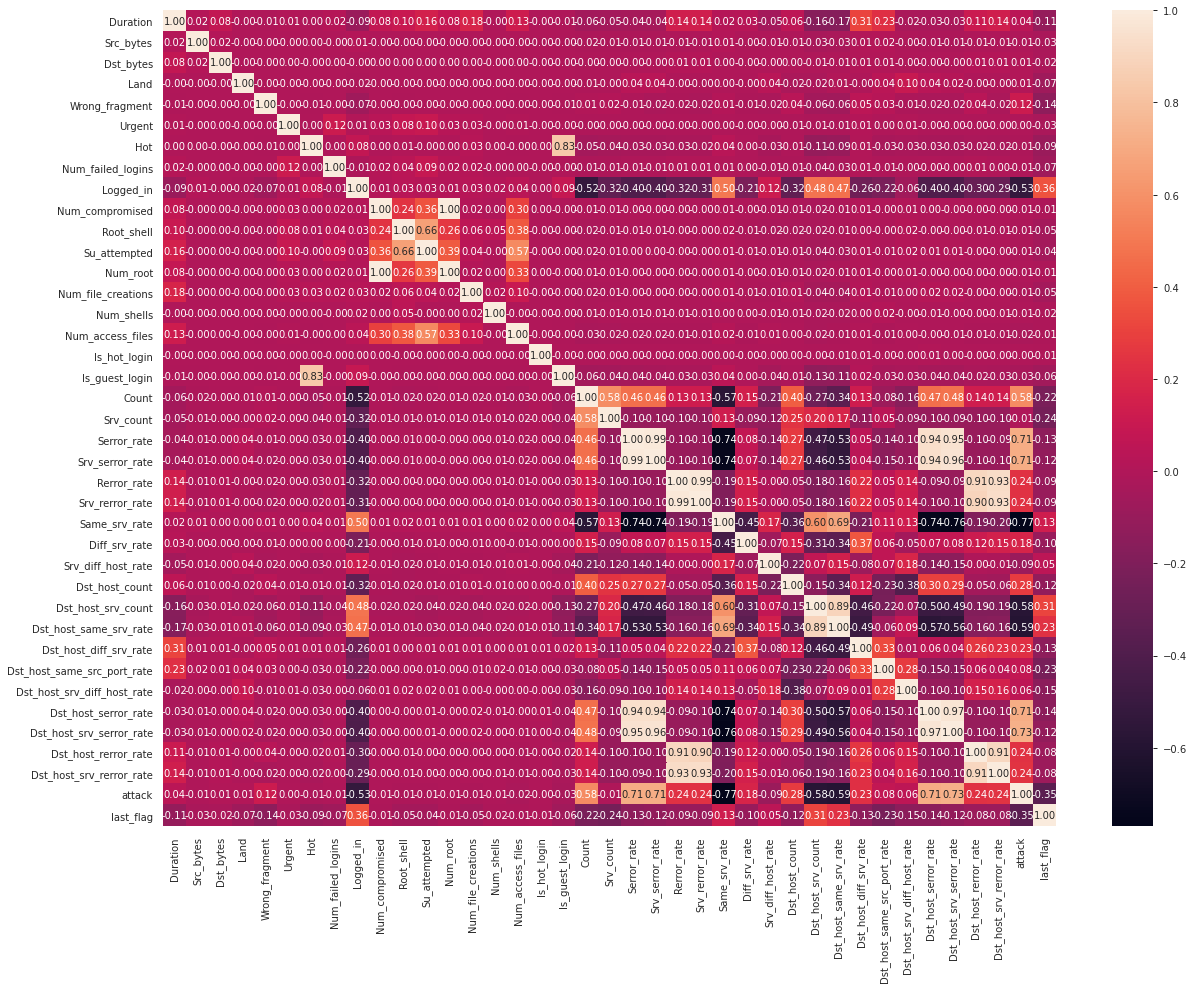

In [ ]:
train_corr = train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(train_corr, annot=True, fmt='0.2f')

### Random 15 columns and make correlations

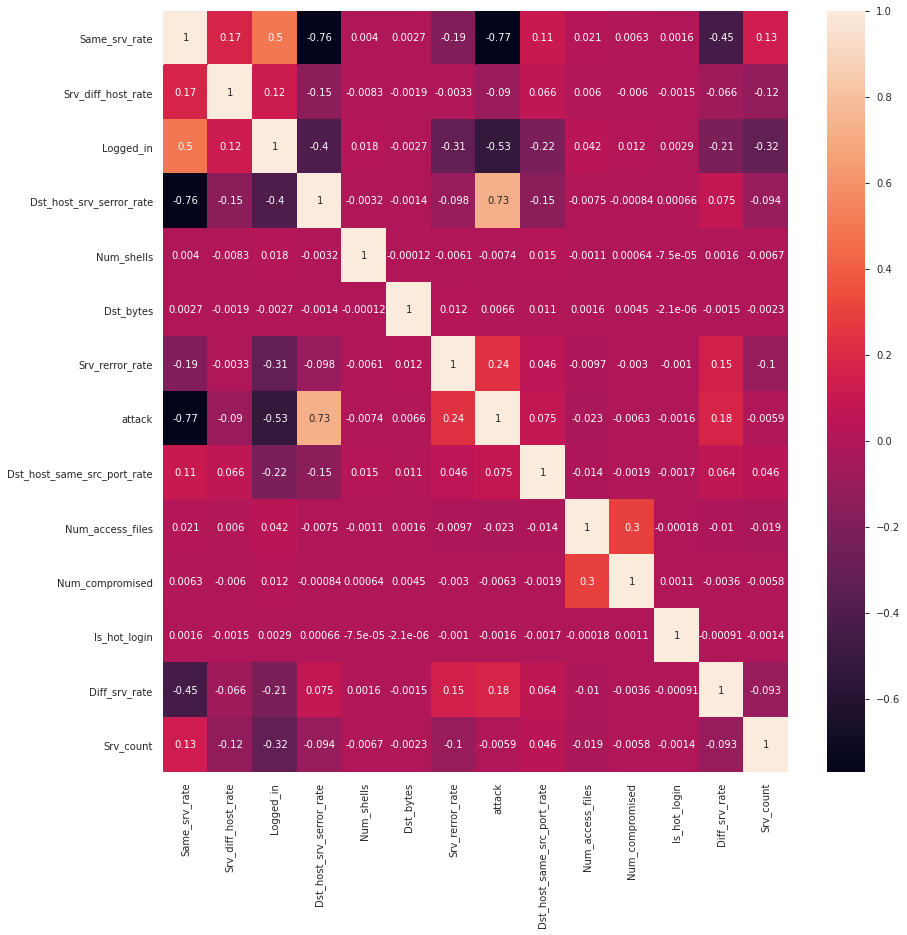

In [ ]:
# Lets take random 15 columns and plot the correlation matrix

small_df = train.sample(15, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(small_corr_matrix, annot=True)

### Lets look at some strong correlations.

In [ ]:
col_names = train.columns                                         # Name of all the columns
col_names

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Is_hot_login', 'Is_guest_login', 'Count',
       'Srv_count', 'Serror_rate', 'Srv_serror_rate', 'Rerror_rate',
       'Srv_rerror_rate', 'Same_srv_rate', 'Diff_srv_rate',
       'Srv_diff_host_rate', 'Dst_host_count', 'Dst_host_srv_count',
       'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate',
       'Dst_host_same_src_port_rate', 'Dst_host_srv_diff_host_rate',
       'Dst_host_serror_rate', 'Dst_host_srv_serror_rate',
       'Dst_host_rerror_rate', 'Dst_host_srv_rerror_rate', 'attack',
       'last_flag'],
      dtype='object')

In [ ]:
# In this block of code we are going to check all the variables with correlation above a certain threshold

corr_threshold = 0.8                                                 # This is a correlation threshold. We need to find variables with greater threshold

print("---------------CHECKING FOR CORRELATION------------")
for c in col_names:
    for r in col_names:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if abs(corr_matrix[r][c]) > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9988405913891037
Is_guest_login : Hot : 0.8345014435714884
Serror_rate : Dst_host_serror_rate : 0.9430935971904737
Serror_rate : Dst_host_srv_serror_rate : 0.9533227114963565
Srv_serror_rate : Serror_rate : 0.98806385257668
Srv_serror_rate : Dst_host_serror_rate : 0.9411508433197037
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9621919153678669
Rerror_rate : Dst_host_rerror_rate : 0.9056647593100042
Rerror_rate : Dst_host_srv_rerror_rate : 0.9301657113713273
Srv_rerror_rate : Rerror_rate : 0.9859603717939368
Srv_rerror_rate : Dst_host_rerror_rate : 0.8956309277220983
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.933453707092518
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8896811763354369
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.9657945117230091
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.9089000644659833


We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [ ]:
y = train['attack']
y.unique()

array([1., 0.])

In [ ]:
y.value_counts()

0.0    67342
1.0    14658
Name: attack, dtype: int64

## Plots

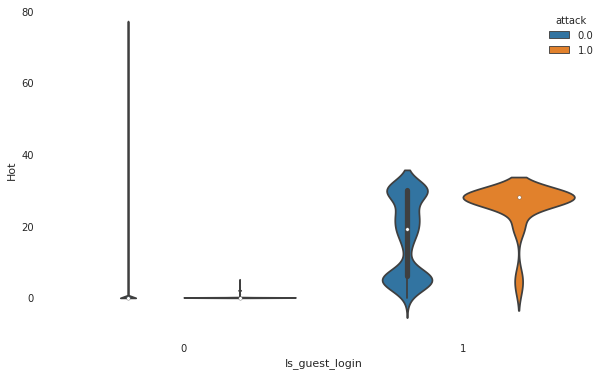

In [ ]:
# Violin plot of Is_guest_login and Hot

plt.figure(figsize=(10,6))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 0-10 and 25-35 **are actually attack connections**.

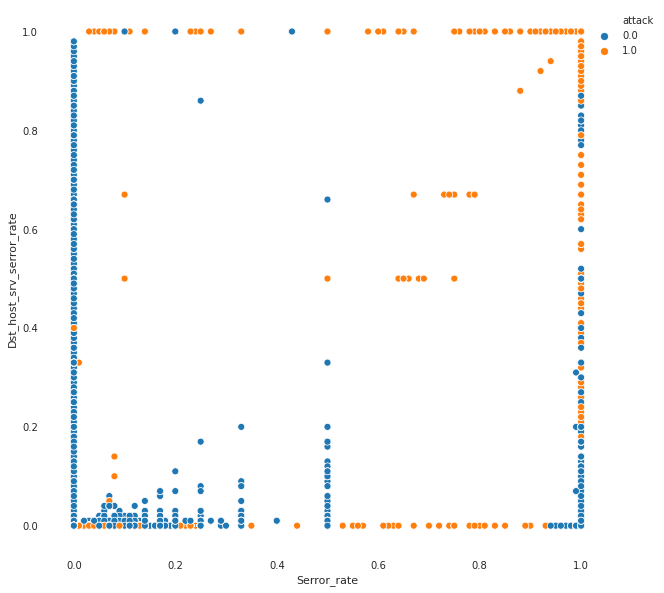

In [ ]:
# Scatter plot of Serror_rate and Dst_host_srv_serror_rate 

plt.figure(figsize=(10,10))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y) 
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)   

**Observation**: There are a lot of attacks happening.

In [ ]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([ 437, 8788]))

**Observation** : There are 8788 attacks when Serror_rate is greater than 0.5

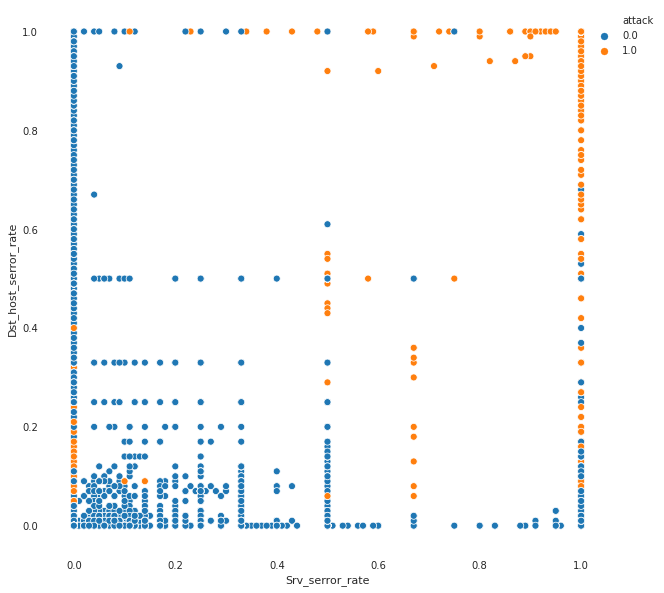

In [ ]:
# Scatter plot of Srv_serror_rate and Dst_host_serror_rate

plt.figure(figsize=(10,10))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)   

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [ ]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array([0., 1.]), array([ 311, 8786]))

**Observation** : 8786 attacks and 311 normal conditions when Srv_serror_rate + Dst_host_serror_rate greater than 1.

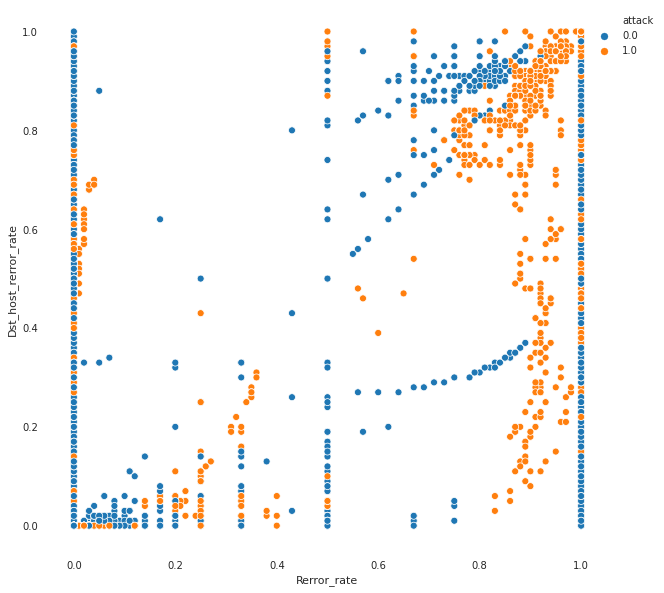

In [ ]:
# Scatter plot of Rerror_rate and Dst_host_rerror_rate  

plt.figure(figsize=(10, 10))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y)  
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)     

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [ ]:
y[train['Rerror_rate'] > 0.5].value_counts()
#np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

1.0    3015
0.0    2948
Name: attack, dtype: int64

**Observation** : 3015 attacks and 2948 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [ ]:
# Lets one hot encode all the categorical columns

encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(82000, 79)

In [ ]:
# We will concat the one hot encoded dataframe with train dataframe

train = pd.concat([train, encoded_cols], axis=1)
train.shape

(82000, 121)

# Creating Features and Labels

In [ ]:
# Lets drop the categorical column as we have already included one hot columns

X = train.drop(cat_cols, axis = 1)

# We will also drop the target column "attack" and "Num_outbound_cmds"
X = X.drop(['attack'], axis = 1)

# Scaling /  Standardizing

In [ ]:
#Lets Use Sandardscaler to normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
X_normalized = scaler.transform(X)

# Create a pandas DataFrame
X = pd.DataFrame(data=X_normalized, index=X.index, columns=X.columns)
X.head()

Duration  Src_bytes  Dst_bytes      Land  Wrong_fragment    Urgent  \
0 -0.111979  -0.030914  -0.006154 -0.012592       -0.056938 -0.009589   
1 -0.111979  -0.030289   0.002478 -0.012592       -0.056938 -0.009589   
2 -0.111979  -0.030712  -0.006154 -0.012592       -0.056938 -0.009589   
3 -0.111979  -0.030320  -0.005933 -0.012592       -0.056938 -0.009589   
4 -0.111979   0.000664  -0.006154 -0.012592       -0.056938 -0.009589   

        Hot  Num_failed_logins  Logged_in  Num_compromised  Root_shell  \
0 -0.097733          -0.027013   -1.19917        -0.014152   -0.041943   
1 -0.097733          -0.027013    0.83391        -0.014152   -0.041943   
2 -0.097733          -0.027013   -1.19917        -0.014152   -0.041943   
3 -0.097733          -0.027013    0.83391        -0.014152   -0.041943   
4 -0.097733          -0.027013    0.83391        -0.014152   -0.041943   

   Su_attempted  Num_root  Num_file_creations  Num_shells  Num_access_files  \
0     -0.030133 -0.015314           -0.031213   -0.021457         -0.050604   
1     -0.030133 -0.015314           -0.031213   -0.021457         -0.050604   
2     -0.030133 -0.015314           -0.031213   -0.021457         -0.050604   
3     -0.030133 -0.015314           -0.031213   -0.021457         -0.050604   
4     -0.030133 -0.015314           -0.031213   -0.021457         -0.050604   

   Is_hot_login  Is_guest_login     Count  Srv_count  Serror_rate  \
0     -0.003492       -0.107744  2.143196  -0.209287     2.784875   
1     -0.003492       -0.107744 -0.491269  -0.379702    -0.374688   
2     -0.003492       -0.107744 -0.046490  -0.395194    -0.374688   
3     -0.003492       -0.107744 -0.445651  -0.317733    -0.374688   
4     -0.003492       -0.107744 -0.468460  -0.348717    -0.374688   

   Srv_serror_rate  Rerror_rate  Srv_rerror_rate  Same_srv_rate  ...  \
0         2.799617    -0.283964        -0.285243      -2.386118  ...   
1        -0.371028    -0.283964        -0.285243       0.451313  ...   
2        -0.371028    -0.283964        -0.285243      -2.416303  ...   
3        -0.371028    -0.283964        -0.285243       0.451313  ...   
4        -0.371028    -0.283964        -0.285243       0.451313  ...   

   Service_sql_net  Service_ssh  Service_sunrpc  Service_supdup  \
0         -0.02567     -0.03125        -0.03125       -0.039229   
1         -0.02567     -0.03125        -0.03125       -0.039229   
2         -0.02567     -0.03125        -0.03125       -0.039229   
3         -0.02567     -0.03125        -0.03125       -0.039229   
4         -0.02567     -0.03125        -0.03125       -0.039229   

   Service_systat  Service_telnet  Service_tftp_u  Service_tim_i  \
0       -0.037475       -0.124671       -0.006049      -0.007809   
1       -0.037475       -0.124671       -0.006049      -0.007809   
2       -0.037475       -0.124671       -0.006049      -0.007809   
3       -0.037475       -0.124671       -0.006049      -0.007809   
4       -0.037475       -0.124671       -0.006049      -0.007809   

   Service_time  Service_urh_i  Service_urp_i  Service_uucp  \
0     19.064219      -0.011044      -0.085782     -0.049571   
1     -0.052454      -0.011044      -0.085782     -0.049571   
2     -0.052454      -0.011044      11.657394     -0.049571   
3     -0.052454      -0.011044      -0.085782     -0.049571   
4     -0.052454      -0.011044      -0.085782     -0.049571   

   Service_uucp_path  Service_vmnet  Service_whois  Flag_REJ  Flag_RSTO  \
0          -0.043798      -0.042233      -0.047937 -0.248937  -0.082699   
1          -0.043798      -0.042233      -0.047937 -0.248937  -0.082699   
2          -0.043798      -0.042233      -0.047937 -0.248937  -0.082699   
3          -0.043798      -0.042233      -0.047937 -0.248937  -0.082699   
4          -0.043798      -0.042233      -0.047937 -0.248937  -0.082699   

   Flag_RSTOS0  Flag_RSTR   Flag_S0  Flag_S1   Flag_S2   Flag_S3   Flag_SF  \
0    -0.016382  -0.092991  2.839503 -0.06659 -0.038601 -0.023948 -2.050939  

In [ ]:
X.shape                                                         # The number of rows and columns in the features

(82000, 117)

In [ ]:
y = train['attack']                                              # The target label
y.unique()

array([1., 0.])

In [ ]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [ ]:
def model_train(model, name):
    model.fit(X_train, y_train)                                          # Fitting the model
    y_pred = model.predict(X_test)                                       # Making prediction from the trained model
    
    print('-----------------------')
    cm = confusion_matrix(y_test, y_pred)                   
    print("Grid Search Confusion Matrix ")                # Displaying the Confusion Matrix
    print(cm)
    print('-----------------------')

    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")           # Displaying the Classification Report
    print(cr)
    print('------------------------')


    auc = roc_auc_score(y_test, y_pred)       
    print("AUC Score " + str(auc))                                       # Displaying the AUC score

    rec = recall_score(y_test, y_pred)
    print("Recall "+ str(rec))                                           # Displaying the Recall score
 
    bias = y_pred - y_test.mean()
    print("Bias "+ str(bias.mean()))
    
    var = np.var([y_test, y_pred], axis=0)
    print("Variance " + str(var.mean()) )
    return auc, rec, model



# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, verbose=1, n_jobs= -1)

In [ ]:
lr_auc, lr_rec, lr_model = model_train(lr, "Logistic Regression")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.3s finished


-----------------------
Grid Search Confusion Matrix 
[[20172   107]
 [  150  4171]]
-----------------------
Logistic Regression Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     20279
         1.0       0.97      0.97      0.97      4321

    accuracy                           0.99     24600
   macro avg       0.98      0.98      0.98     24600
weighted avg       0.99      0.99      0.99     24600

------------------------
AUC Score 0.9800047095847914
Recall 0.9652858134691044
Bias -0.0017479674796748274
Variance 0.0026117886178861787


Model is not so great with a lot of FN.

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf =3, random_state=101)

In [ ]:
dt_auc, dt_rec, dt_model = model_train(dt, "Decision Tree")

Grid Search Confusion Matrix  Validation Data
[[13422     6]
 [    6  2966]]
-----------------------
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      1.00      1.00      2972

    accuracy                           1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Decision Tree AUC Score  Validation Data
AUC Score 0.998767164972571
Decision Tree Recall  Validation Data
Recall 0.9979811574697174
_________________________
Decision Tree Bias
Bias 3.528342929479461e-17
Decision Tree Variance
Variance 0.00018292682926829268


**The metric of our choice should be Recall as we want to minimize FN, which means that an attack accured but the model did not detect it.**

## Random Forest Algorithm

In [ ]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_auc, rf_rec, rf_model = model_train(rf_clf, "Random Forest Classifier")

Grid Search Confusion Matrix  Validation Data
[[13427     1]
 [    8  2964]]
-----------------------
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      1.00      1.00      2972

    accuracy                           1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Random Forest Classifier AUC Score  Validation Data
AUC Score 0.9986168693527636
Random Forest Classifier Recall  Validation Data
Recall 0.9973082099596231
_________________________
Random Forest Classifier Bias
Bias -0.0004268292682926472
Random Forest Classifier Variance
Variance 0.00013719512195121953


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators': range(5,20),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

rf = RandomForestClassifier()

rf_gs = GridSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 21.9min finished


In [ ]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

print("Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')
print("Grid Search AUC Score " +" Validation Data")
auc = roc_auc_score(y_test, y_pred)       
print("AUC Score " + str(auc))                                       # Displaying the AUC score
print("Grid Search Recall " +" Validation Data")
rec = recall_score(y_test, y_pred)
print("Recall "+ str(rec))                                           # Displaying the Recall score
print('_________________________')
print("Grid Search Bias")                                                 # Calculating bias
bias = y_pred - y_test.mean()
print("Bias "+ str(bias.mean()))
    
print("Grid Search Variance")                                             # Calculate Variance
var = np.var([y_test, y_pred], axis=0)
print("Variance " + str(var.mean()) )

Grid Search Validation Data
Grid Search Confusion Matrix  Validation Data
[[13426     2]
 [    8  2964]]
-----------------------
Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      1.00      1.00      2972

    accuracy                           1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Grid Search AUC Score  Validation Data
AUC Score 0.9985796337257156
Grid Search Recall  Validation Data
Recall 0.9973082099596231
_________________________
Grid Search Bias
Bias -0.00036585365853654986
Grid Search Variance
Variance 0.0001524390243902439


## Randomized Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.3s finished


In [ ]:

print("Randomized Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Randomized Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Randomized Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')
print("Randomized Grid Search AUC Score " +" Validation Data")
auc = roc_auc_score(y_test, y_pred)       
print("AUC Score " + str(auc))                                       # Displaying the AUC score
print("Randomized Grid Search Recall " +" Validation Data")
rec = recall_score(y_test, y_pred)
print("Recall "+ str(rec))                                           # Displaying the Recall score
print('_________________________')
print("Randomized Grid Search Bias")                                                 # Calculating bias
bias = y_pred - y_test.mean()
print("Bias "+ str(bias.mean()))
    
print("Randomized Grid Search Variance")                                             # Calculate Variance
var = np.var([y_test, y_pred], axis=0)
print("Variance " + str(var.mean()) )

Randomized Grid Search Validation Data
Randomized Grid Search Confusion Matrix  Validation Data
[[13427     1]
 [   10  2962]]
-----------------------
Randomized Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      1.00      1.00      2972

    accuracy                           1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Randomized Grid Search AUC Score  Validation Data
AUC Score 0.9982803955977165
Randomized Grid Search Recall  Validation Data
Recall 0.9966352624495289
_________________________
Randomized Grid Search Bias
Bias -0.0005487804878048425
Randomized Grid Search Variance
Variance 0.0001676829268292683


In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Explainations

### Permutation Importance

We will run the permutation importance using Decision Tree Classifier

In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt_model, random_state=101).fit(X_test, y_test)      # Evaluate the permutation importance 
eli5.show_weights(perm, feature_names = X_test.columns.values)                    # Display the weights of each features

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Lets check the same with Random Forest classifier

In [ ]:
perm = PermutationImportance(rf_model, random_state=101).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.values)

**Conclusion**: The columns in the green are the most important features.

### Shap

Lets see how the columns impact a single record of data

In [ ]:
row_to_show = 7                                                                # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]
#data_to_predict

In [ ]:
data_to_preddict_array = data_to_predict.values.reshape(1,-1)

dt_model.predict_proba(data_to_preddict_array)                                 # Prediction probability on the row of the data

array([[0., 1.]])

In [ ]:
dt_model.predict(data_to_preddict_array)                                       # Predicted output

array([1.])

In [ ]:
y_test.iloc[row_to_show]

1.0

In [ ]:
import shap

# Object that can calculate Shap values
explainer = shap.TreeExplainer(dt_model)                                       # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict)                           # SHAP explanations

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

### LIME

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                         feature_names=X_train.columns.values.tolist(),
                                                         mode='classification',class_names='Attack')


In [ ]:
lime_expln1=explainer.explain_instance(X_test.iloc[1],dt_model.predict_proba,num_features=X_test.shape[1], top_labels = 1)
lime_expln1.show_in_notebook(show_table=True, show_all=False)